<a href="https://colab.research.google.com/github/mlabiunda/data25/blob/main/Copia_de_Notebook_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science




## Analisis Exploratorio de un Dataset

Esta notebook les permitiria ejercitar los conceptos de Pandas 🐼  y Análisis exploratorio de datos 📊 que aprendimos hasta ahora. Vamos a trabajar con un dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers). En el Drive esta descargado el archivo. Si tenes inconvenientes o  ese archivo no funciona podes descargarlo directamente de la página web.

### 🔬 Comenzando el proyecto 🎉

Es tu primer dia como Data Scientist. Tu primer proyecto consiste en hacer un análisis de datos sobre clientes de un centro comercial para luego hacer una predicción de ventas o un analisis de cluster. Antes que nada, debes inspeccionar y visualizar tu dataset para saber con que datos estas trabajando.

Como mencionamos durante la clase, una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como _"Analisis exploratorio de los datos"_.

Además de obtener que tipo de datos contiene el dataset, estadistica descriptiva, detectar problemas como valores faltantes, establecer que tipo de relación existe entre las distintas variables, también debemos visualizar los datos. Este análisis nos permitira hacernos preguntas que puedan ser contestadas con el dataset como así plantear estrategias para poder resolver problemas presentes en él.

#### IMPORTA LAS LIBRERIAS NECESARIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### LEE LOS DATOS

**_Lee los datos que se encuentran en el archivo `clientes_mall.csv`. Guardalos en un DataFrame._**

In [ ]:
clientes_mall = pd.read_csv('clientes_mall.csv')

#### INSPECCIONA LOS DATOS

Primero obtene una visión general del dataset:


🤔 &nbsp; **_¿Como se ven las primeras 5 filas? ¿Cuantas filas y columnas posee? ¿Que tipos de datos contiene cada una de las columnas?_**

In [ ]:
clientes_mall.shape

(200, 6)

In [ ]:
clientes_mall.head()

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0
3,3,4.0,Female,23.0,16.0,77.0
4,4,5.0,NaN,31.0,17.0,40.0


In [ ]:
clientes_mall

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1.0,Male,19.0,15.0,39.0
1,1,2.0,NaN,21.0,15.0,81.0
2,2,3.0,Female,20.0,16.0,6.0
3,3,4.0,Female,23.0,16.0,77.0
4,4,5.0,NaN,31.0,17.0,40.0
...,...,...,...,...,...,...
195,195,196.0,NaN,35.0,120.0,79.0
196,196,197.0,Female,45.0,126.0,28.0
197,197,198.0,Male,32.0,126.0,74.0
198,198,199.0,Male,32.0,137.0,18.0


In [ ]:
clientes_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              200 non-null    int64  
 1   CustomerID              189 non-null    float64
 2   Genre                   186 non-null    object 
 3   Age                     189 non-null    float64
 4   Annual Income (k$)      185 non-null    float64
 5   Spending Score (1-100)  186 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


**_Hay algunas columnas que tienen nombres incomodos (ej. `Spending Score (1-100)` y `Annual Income (k$)`). Renombra esas columnas_**

In [ ]:
clientes_mall.rename(columns={'Spending Score (1-100)': 'Spending Score', 'Annual Income (k$)': 'Annual Income'}, inplace=True)
#inplace=True busca en columnas y renombra
#De las columnas Spending Score (1-100) y Annual Income (k$) borramos los parentesis

#### Valores faltantes

🤔 &nbsp; **_¿Hay valores faltantes en alguna de las columnas?_**

In [ ]:
clientes_mall.isnull().sum()

,0
Unnamed: 0,0
CustomerID,11
Genre,14
Age,11
Annual Income,15
Spending Score,14


**_Elimina todas las filas que tengan valores faltantes_**

In [ ]:
clientes_mall.dropna(inplace=True)


clientes_mall.isnull().sum()

,0
Unnamed: 0,0
CustomerID,0
Genre,0
Age,0
Annual Income,0
Spending Score,0


#### FILTRA LOS DATOS

Porque tu compañia quiere diseñar un a campaña de marketing especial para personas entre 25 y 40 años, vamos a analizar los datos solo para estos clientes.

🤔 &nbsp; **_Chequea que categorias aparecen en la columna `Age`_**.

In [ ]:
clientes_mall['Age'].unique()

array([19., 20., 23., 22., 30., 67., 35., 58., 24., 37., 25., 31., 54.,
       29., 45., 40., 60., 49., 42., 36., 50., 27., 33., 59., 47., 53.,
       70., 63., 18., 68., 32., 26., 57., 38., 46., 21., 48., 34., 66.,
       65., 51., 43., 39., 44., 28., 41.])

**_Filtra los datos para quedarte unicamente con las filas que correspondan a personas entre 25 y 40 años. Guardalo en una variable que se llame `clientes_seleccionados`._**

In [ ]:
clientes_mall_restricción=clientes_mall[(clientes_mall['Age'] >= 25) & (clientes_mall['Age'] <= 40)]

print(clientes_mall_restricción)

     Unnamed: 0  CustomerID   Genre   Age  Annual Income  Spending Score
9             9        10.0  Female  30.0           19.0            72.0
11           11        12.0  Female  35.0           19.0            99.0
14           14        15.0    Male  37.0           20.0            13.0
16           16        17.0  Female  35.0           21.0            35.0
19           19        20.0  Female  35.0           23.0            98.0
..          ...         ...     ...   ...            ...             ...
191         191       192.0  Female  32.0          103.0            69.0
192         192       193.0    Male  33.0          113.0             8.0
197         197       198.0    Male  32.0          126.0            74.0
198         198       199.0    Male  32.0          137.0            18.0
199         199       200.0    Male  30.0          137.0            83.0

[61 rows x 6 columns]


**_Reiniciamos el indice usando `reset_index()` para que las filas vuelvan a ser numeradas a partir de 0. `drop=True` permite descartar los indices anteriores y no guardarlos como una nueva columna. `inplace=True` permite que se modifique el DataFrame original._**

In [ ]:
clientes_mall_restricción.reset_index(drop=True, inplace=True)
clientes_mall_restricción

,Unnamed: 0,CustomerID,Genre,Age,Annual Income,Spending Score
0,9,10.0,Female,30.0,19.0,72.0
1,11,12.0,Female,35.0,19.0,99.0
2,14,15.0,Male,37.0,20.0,13.0
3,16,17.0,Female,35.0,21.0,35.0
4,19,20.0,Female,35.0,23.0,98.0
...,...,...,...,...,...,...
56,191,192.0,Female,32.0,103.0,69.0
57,192,193.0,Male,33.0,113.0,8.0
58,197,198.0,Male,32.0,126.0,74.0
59,198,199.0,Male,32.0,137.0,18.0


**_Obtene estadistica descriptiva para las columnas que corresponden al salario anual y puntaje de gastos de las personas entre 25 y 40 años. Lo importante es que se muestre promedio, mediana, desvio estandard, valores minimos y maximos._**

In [ ]:
clientes_mall_restricción[['Annual Income','Spending Score']].describe()

,Annual Income,Spending Score
count,61.00000,61.000000
mean,67.04918,56.639344
std,28.81286,28.287237
min,19.00000,1.000000
25%,43.00000,35.000000
50%,72.00000,58.000000
75%,81.00000,78.000000
max,137.00000,99.000000


from matplotlib import pyplot as plt
_df_5['Annual Income'].plot(kind='hist', bins=20, title='Annual Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Spending Score'].plot(kind='hist', bins=20, title='Spending Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Annual Income', y='Spending Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Annual Income'].plot(kind='line', figsize=(8, 4), title='Annual Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Spending Score'].plot(kind='line', figsize=(8, 4), title='Spending Score')
plt.gca().spines[['top', 'right']].set_visible(False)

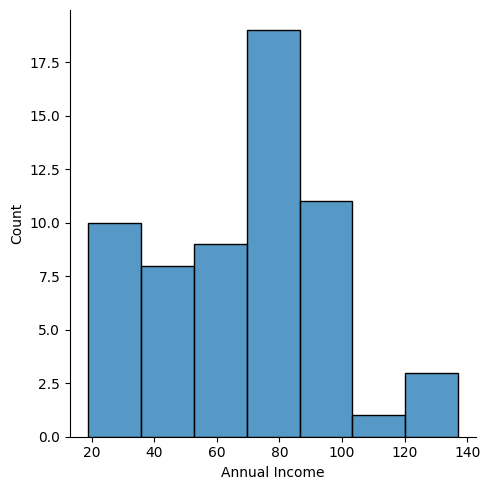

In [ ]:

sns.displot(clientes_mall_restricción['Annual Income'])
sns.despine()

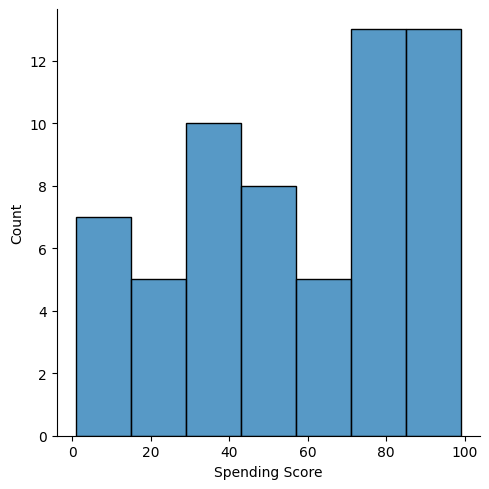

In [ ]:

sns.displot(clientes_mall_restricción['Spending Score'])
sns.despine()

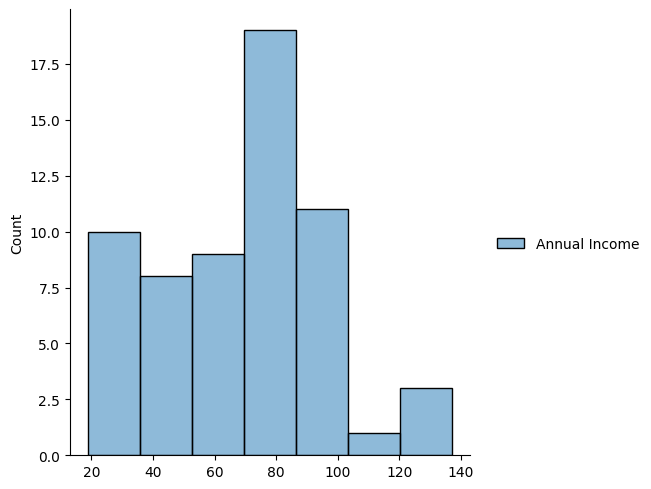

In [ ]:

sns.displot([clientes_mall['Annual Income'],clientes_mall_restricción['Annual Income']])
sns.despine()

🤔 &nbsp; De acuerdo a los valores **_¿Cuál es el sueldo promedio de estos clientes? ¿Cual es el puntaje de gastos mediano en el grupo? ¿Crees que son buenas medidas para caracterizar el grupo?_**

In [ ]:
print("sueldo promedio de clientes, en miles, para grupo 25-40 años",clientes_mall_restricción['Annual Income'].mean())

print("Puntaje de gastos mediano, para grupo 25-40 años",clientes_mall_restricción['Spending Score'].median())

print("Evaluamos que hay indicadores devalores outliers en ambos parametros, viendo los valores min, max, std, además la muestra es chica - poco representativa")


sueldo promedio de clientes, en miles, para grupo 25-40 años 67.04918032786885
Puntaje de gastos mediano, para grupo 25-40 años 58.0
Evaluamos que hay indicadores devalores outliers en ambos parametros, viendo los valores min, max, std, además la muestra es chica - poco representativa


**_Compara estos valores con aquellos de los clientes en general._**

In [ ]:
clientes_mall[['Annual Income','Spending Score']].describe()

,Annual Income,Spending Score
count,139.000000,139.000000
mean,60.762590,47.856115
std,26.636464,25.678492
min,15.000000,1.000000
25%,42.500000,28.000000
50%,61.000000,47.000000
75%,77.000000,67.500000
max,137.000000,99.000000


from matplotlib import pyplot as plt
_df_0['Annual Income'].plot(kind='hist', bins=20, title='Annual Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Spending Score'].plot(kind='hist', bins=20, title='Spending Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Annual Income', y='Spending Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Annual Income'].plot(kind='line', figsize=(8, 4), title='Annual Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Spending Score'].plot(kind='line', figsize=(8, 4), title='Spending Score')
plt.gca().spines[['top', 'right']].set_visible(False)

**_Obtiene la edad promedio de clientes que tienen un sueldo mayor al promedio._**

**_Compara estos valores con aquellos de los clientes en general._**

🤔 &nbsp; **_¿Qué otras preguntas te surgen para analizar en este dataset?_**

#### VISUALIZA LOS DATOS

**_Visualiza la distribución de las variables de sueldo promedio y puntaje de gastos. Haz gráficos que superpongan la distribución de cada una de estas variables de manera global como también sólo para los clientes seleccionados._**

**_Agrupa los datos por la variable `Genre` para ambos casos. Gráfica el ingreso promedio y su dispersion. Grafica, luego, el ingreso mediano y su rango intercuartil._**

🤔 &nbsp; **_¿Existe una correlación entre el sueldo anual y el puntaje de gastos en los clientes seleccionados? ¿Y en todos los clientes en general?_**

**_Visualiza otros datos que creas relevantes para este analisis._**

#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

Los siguientes pasos que vamos a tomar implican la transformación de los datos presentes en el dataset para un correcto ajuste de un modelo a elección. Para no tener que correr nuevamente todo el código, podemos guardar en un archivo `csv` el dataset tal cual lo tenemos ahora.

1) **Utiliza la función `.to_csv()` para guardar tu dataset**. Antes de hacerlo chequea la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html).